# Motion of a charge through a charged ring

In problem 2 you computed the electric field along the axis of a charged ring of radius $R$. Imagine that a charge $Q=1\,{\rm \mu C}$ of mass $m=100\,g$ is released from a point $x_0$ on the axis at time $t=0$. Compute the trajectory of the charge assuming $R=1m$ and that the ring carries the opposite charge $-Q$ up to $t=1000\,s$ for $x_0=1\,m$ and $x_0=10\,m$. 

In order to do this, we need to numerically integrate Newton's equation of motion ${\bf F}=m{\bf a}$. This is a second order ordinary differential equation. Without getting into any details about numerical methods for integrating ODEs, all of them are essentially based on a Taylor expansion in time for a small time time increment $\Delta t$. A suitable algorithm for this particular kind is the "velocity Verlet" method. Let us denote position, velocity and acceleration at time $t$ with $x(t)$, $v(t)$ and $a(t)$ then these quantities after a small time step $\Delta t$ can be obtained as follows:


$$v(t+\Delta t/2)=v(t)+ a(t)\Delta t/2$$
$$x(t+\Delta t)=x(t)+ v(t+\Delta t/2)\Delta t$$
$$v(t+\Delta t)=v(t+\Delta t/2)+ a(t+\Delta t)\Delta t/2$$

These equations are in a form that can be directly implemented in a computer program. First define all relevant constants and a function that returns the force or acceleration as a function of position $x(t)$, and initialize the position to $x(0)=x_0$ and the velocity to $v(0)=0$. Then advance $x(t)$ and $y(t)$ according to the algorithm above and store the trajectory in an array. Your answer should consist of a plot of this trajectory (position versus time) for the two initial positions given above. Comment on the differences between these trajectories. Make sure you integrate long enough to see the characteristic pattern of the motion in each case.

Hints: By considering the symmetry of the problem, you should notice that the charge moves in one dimension only. You can try out different values of the timestep $\Delta t$ (what happens qualitatively), but a possible value for the parameters given above is $\Delta t=1s$. Also, ignore gravity. If you have time, experiment with the paramenters of the problem (mass, charge, size of ring, etc.)

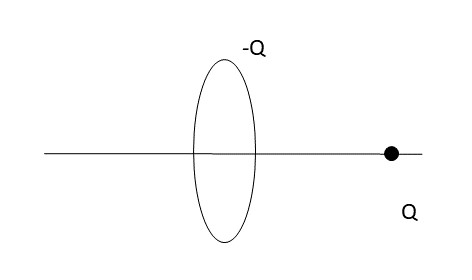


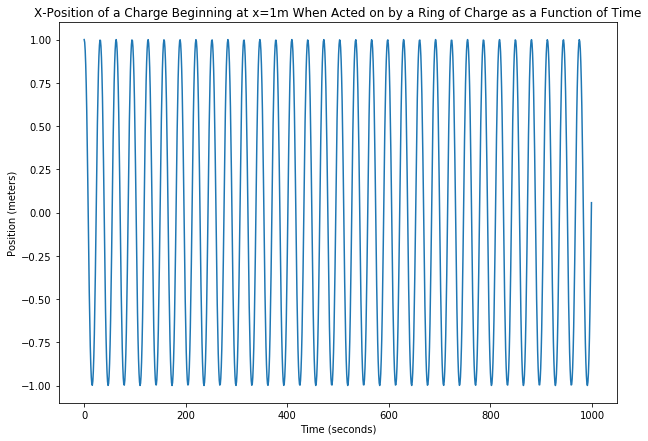

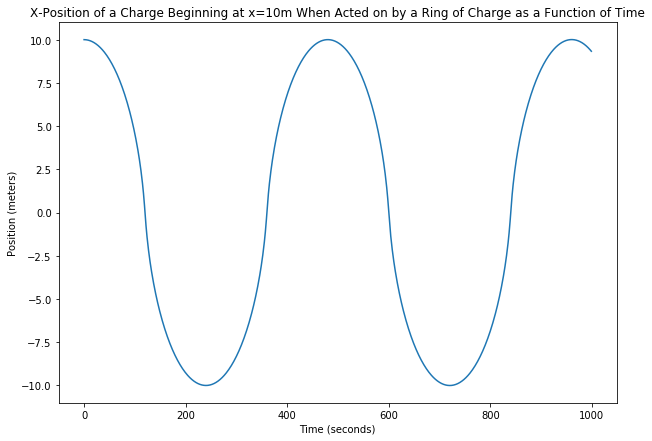

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams.update({'font.size':20}) #optional to change default font size

# define constants
x01 = 1                           #meters
x02 = 10                          #meters
dt = 1                            #seconds
tfinal = 1000                     #seconds
charge = 1e-6                     #Coulomb
mass = 0.1                        #kilograms
radius = 1                        #meters
density = charge/(2*np.pi*radius) #Coulomb per meters
k = 8.988e9                       #kilogram*meters^3/(seconds^2*coulombs^2)

# set up arrays for position and time
time = np.arange(0, tfinal, dt)
xValues1 = x01*np.ones(len(time))
xValues2 = x02*np.ones(len(time))

# define a function that returns the force or acceleration
def Acceleration(xVal):
    EConstant = 2*k*np.pi*density*radius
    EField = EConstant*xVal*((xVal**2+radius**2)**(-3/2))
    Force = -charge*EField
    return Force/mass

# set initial position and velocity
vValues1 = np.zeros(2*len(time)-1)
vValues2 = np.zeros(2*len(time)-1)

# integrate equation of motion
for index in range(len(time)-1):
    vValues1[2*index+1]=vValues1[2*index]+Acceleration(xValues1[index])*dt/2
    vValues2[2*index+1]=vValues2[2*index]+Acceleration(xValues2[index])*dt/2
    xValues1[index+1]=xValues1[index]+vValues1[2*index+1]*dt
    xValues2[index+1]=xValues2[index]+vValues2[2*index+1]*dt
    vValues1[2*index+2]=vValues1[2*index+1]+Acceleration(xValues1[index+1])*dt/2
    vValues2[2*index+2]=vValues2[2*index+1]+Acceleration(xValues2[index+1])*dt/2

# plot trajectories
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('X-Position of a Charge Beginning at x=1m When Acted on by a Ring of Charge as a Function of Time')
plt.plot(time, xValues1)
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.show()

plt.figure(figsize=(10, 7))
plt.title('X-Position of a Charge Beginning at x=10m When Acted on by a Ring of Charge as a Function of Time')
plt.plot(time, xValues2)
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.show()

We can see from the above graphs that the two forms are both different and similar in some cases. Both follow a path resembling a sine wave with no decay. The postion as a function of time never exceeds the starting values and it peaks never go below it. However, the main difference between the two cases is that the wavelength and frequency of the charge starting closer is much shorter and higher, respectively, than the charge which started ten times farther away.